In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# `sklearn` Boston Housing Price Dataset

In [2]:
from sklearn import datasets

In [3]:
boston = datasets.load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
X = boston['data']
y = boston['target']
print(f'Input shape: {X.shape}')
print(f'Output shape: {y.shape}')

Input shape: (506, 13)
Output shape: (506,)


## Implement LinReg from scratch: minimizing a loss function

In [12]:
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

In [8]:
# Least squares error, summed over training samples
def loss(w):
    s = 0
    for i in range(y.size):
        y_i_true = y[i]
        y_i_pred = np.dot(w, X[i])
        s += (y_i_true - y_i_pred)**2
    
    return s

In [9]:
# returns w that makes loss(w) smallest
w_fit = minimize(loss, X[0]).x
print(w_fit)

[-9.28967216e-02  4.87147166e-02 -4.06378288e-03  2.85400590e+00
 -2.86837342e+00  5.92813683e+00 -7.26924629e-03 -9.68512149e-01
  1.71144310e-01 -9.39578125e-03 -3.92189417e-01  1.49054562e-02
 -4.16305997e-01]


In [13]:
# compare with sklearn's LinearRegression coefs
lr = LinearRegression(fit_intercept=False).fit(X, y)
print(lr.coef_)

[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


# Loss functions: Logistic and Hinge loss

In [15]:
# math functions for logistic and hinge losses
def log_loss(raw_model_output):
    return np.log(1+np.exp(-raw_model_output))

def hinge_loss(raw_model_output):
    return np.maximum(0, 1-raw_model_output)

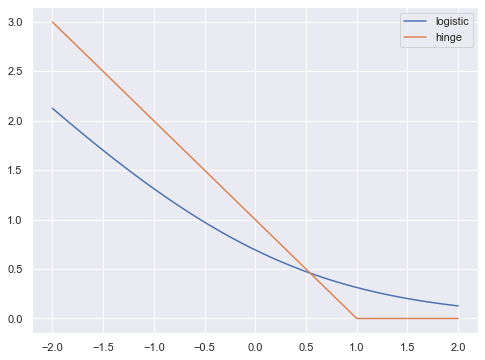

In [16]:
# plot the loss functions
grid = np.linspace(-2, 2, 1000)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(grid, log_loss(grid), label='logistic')
ax.plot(grid, hinge_loss(grid), label='hinge')

plt.legend()
plt.show()

# `sklearn` Breast Cancer Prediction Dataset

In [30]:
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression

In [17]:
breast = datasets.load_breast_cancer()

In [18]:
breast.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [21]:
X = breast['data'][:, 0:10] # first ten features only
y = breast['target']
print(f'Input shape: {X.shape}')
print(f'Output shape: {y.shape}')

Input shape: (569, 10)
Output shape: (569,)


In [24]:
X = scale(X)
y[y == 0] = -1

In [27]:
# logloss summed over training examples
def sum_log_loss(w):
    s = 0
    for i in range(X.shape[0]):
        raw_model_output = np.dot(w, X[i])
        s += log_loss(raw_model_output*y[i])
    return s

In [37]:
# returns w that makes loss smallest
w_fit = minimize(sum_log_loss, X[0]).x
print(w_fit)

[ 1.03614078 -1.6537836   4.08309627 -9.40923928 -1.06786627  0.07893099
 -0.8511011  -2.44102825 -0.45285579  0.43353545]


In [31]:
# compare with sklearn's logreg
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X, y)
print(lr.coef_)

[[ 1.03665946 -1.65380077  4.08233062 -9.40904867 -1.06787935  0.07901598
  -0.85099843 -2.44107473 -0.45288928  0.43348202]]
